<a href="https://colab.research.google.com/github/LauraCorredor7/Finanzas-Computacionales/blob/main/Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog
import cvxpy  as cp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


1. Dibujar la región factible el siguiente problema de programación lineal (LP) con dos
variables:

            máx 2x1 − x2
            x1 + x2 ≥ 1
            x1 − x2 ≤ 0
            3x1 + x2 ≤ 6
            x1, x2 ≥ 0

In [3]:
# Parametros de la función objetivo
c1 = np.array([-2, 1])

# Restricciones de desigualdad
A1 = np.array([[1, 1], [1, -1], 
               [3, 1]])
b1 = np.array([1, 0, 6])

# Solución del problema
res = linprog(c1, A_ub=A1, b_ub=b1, method='revised simplex')
res

     con: array([], dtype=float64)
     fun: -0.5
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 4.])
  status: 0
 success: True
       x: array([0.5, 0.5])

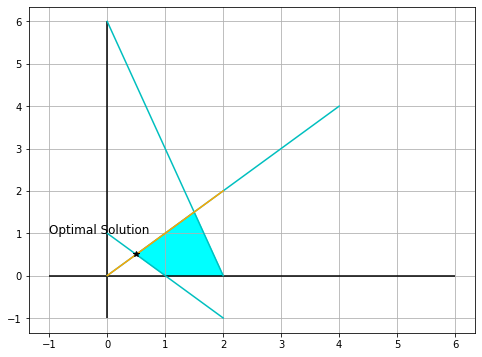

In [12]:
from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Draw constraint lines
ax.hlines(0, -1, 6)
ax.vlines(0, -1, 6)
ax.plot(np.linspace(0, 2), 1-1*np.linspace(0, 2), color="c")
ax.plot(np.linspace(0, 4), 0+1*np.linspace(0, 4), color="c")
ax.plot(np.linspace(0, 2), 6-3*np.linspace(0, 2), color="c")

# Draw the feasible region
feasible_set = Polygon(np.array([[0.5, 0.5], 
                                 [1.5, 1.5], 
                                 [2, 0], 
                                 [1,0]]), 
                       color="cyan")
ax.add_patch(feasible_set)

# Draw the objective function
ax.plot(np.linspace(0, 2), 0+1*np.linspace(0, 2), color="orange")
#ax.arrow(-1.6, 1.5, 0, 0.5, width = 0.05, head_width=0.2, head_length=0.5, color="orange")


# Draw the optimal solution
ax.plot(0.5, 0.5, "*", color="black")
ax.text(-1, 1, "Optimal Solution", size=12)

plt.show()

2. Usted desea invertir la suma de $80 millones en cuatro fondos mutuos que tienen diferentes retornos esperados (E(Ri)), así como diferentes ponderaciones en acciones de capitalización grande, mediana y pequeña, como muestra la siguiente tabla:

In [18]:
c = np.array([0.1,0.15,0.16,0.08])
A = np.array([[1,1,1,1]])
b = np.array([80]) 
D = np.array([[0.5,0.3,0.25,0.6],
              [0.3,0.1,0.4,0.2],
              [0.2,0.6,0.35,0.2]])
d = np.array([28,24,12])#Restricción

resultado = linprog(-c,A_ub=-D,b_ub=-d,A_eq=A,b_eq=b,method="simplex")
resultado
#x.value

array([1.57371307e-07, 1.26315784e+01, 4.63157899e+01, 2.10526315e+01])

In [14]:
#CVXPY
n = len(c) # de elementos que requiere el vector c
x = cp.Variable(n)

objective =cp.Maximize((c.T @ x))
constraints = [D @ x >= d, A @ x == b, x>=0]
prob = cp.Problem(objective, constraints)

result=prob.solve()
sol = round(pd.DataFrame(x.value),6)
sol

,0
0,0.000000
1,12.631578
2,46.315790
3,21.052632


La asignación factible 

3. La empresa XYZ se enfrente al siguiente problema de financiación a corto plazo. Las cifras están expresadas en millones ($).

In [ ]:
b = np.array([150,100,-200,200,-50,-300])
c = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1])#Función objetivo
rx = np.array([1.01])#Tasa de crédito
ry = np.array([1.02])#Tasa de bono
rz = np.array([1.003])#Tasa excedente
A = np.array([[1,0,0,0,0, 1,0,0, -1,0,0,0,0,0],
              [-rx,1,0,0,0, 0,1,0, rz,-1,0,0,0,0],
              [0,-rx,1,0,0, 0,0,1, 0,rz,-1,0,0,0],
              [0,0,-rx,1,0, -ry,0,0, 0,0,rz,-1,0,0],
              [0,0,0,-rx,1, 0,-ry,0, 0,0,0,rz,-1,0],
              [0,0,0,0,-rx, 0,0,-ry, 0,0,0,0,rz,-1]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
n = len(c) # de elementos que requiere el vector c
x = cp.Variable(n)

objective =cp.Maximize((c.T @ x))
constraints = [A @ x == b, x>=0]
prob = cp.Problem(objective, constraints)

result=prob.solve()
sol = round(pd.DataFrame(x.value),6)
sol

,0
0,0.000001
1,42.686747
2,0.000000
3,0.000000
4,8.459517
5,150.000000
6,57.313253
7,195.057783
8,0.000001
9,0.000000


#4. Para las variables aleatorias, xi y yi con i = 1,2, ... , N; demuestre que el vector de coeficientes β del modelo lineal y = β̂TX + ε,

In [ ]:
## Estimaciones para AAPL
# Información histórica para AAPL 
fechai = "2017-08-01"
fechaf = "2022-08-31"
periodicidad = "1Mo"
aapl = ["AAPL"]
p_aapl = yf.download(aapl,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_aapl = np.log(p_aapl/p_aapl.shift(1)).dropna()

indice = yf.download("^GSPC",start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_indice = np.log(indice/indice.shift(1)).dropna()


r_aapl.shape

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(60,)

In [ ]:
#regresion con  Usando SkLearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(pd.DataFrame(r_indice), pd.DataFrame(r_aapl))
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')
# encontramos el resultado segun el modelo lineal y = β̂TX + ε

alpha = [0.01389624]
betas = [[1.2021161]]


In [ ]:
from numpy.core.fromnumeric import transpose
# Variables
 
t = len(r_indice) # se cuentan cuantos datos existe
unos = pd.DataFrame(np.repeat(1,t))# se crea un vector de unos
r_indice2 = pd.DataFrame(r_indice)
r_aapl2 = pd.DataFrame(r_aapl)

variables = np.concatenate((unos,r_indice2),1) # se multiplica las X por un vector de unos
X_T = transpose(variables) # se traspone la variable para hacer la formula  Q = (X^T*X)^−1
X=variables

Q=np.dot(X_T,X)# se multiplica las dos matrices X.T y X  para encontrar Q = (X^T*X)^−1
Y=r_aapl 
X_T = transpose(variables)
b=np.dot(X_T,Y)# se multiplica las amtrices para encontrar b = X^T*y.

B= np.linalg.solve(Q,b) # se crea la matriz inversa 
B  # encontramos que el resultado de β̂ = Q^−1*b es la misma  que el modelo y = β̂TX + ε


array([0.01389624, 1.2021161 ])

5. Un fondo de pensiones necesita cubrir algunos pasivos en los próximos seis años según
los siguientes requerimientos de efectivo (cifras en millones $):

In [21]:
b = np.array([100,200,800,100,800,1200])

A = np.array([[10,7,8,6,7,5,10,8,7,100,-1,0,0,0,0,0],
              [10,7,8,6,7,5,10,8,107,0,0,-1,0,0,0,0],
              [10,7,8,6,7,5,110,108,0,0,0,0,-1,0,0,0],
              [10,7,8,6,7,105,0,0,0,0,0,0,0,-1,0,0],
              [10,7,8,106,107,0,0,0,0,0,0,0,0,0,-1,0],
              [10,107,108,0,0,0,0,0,0,0,0,0,0,0,0,-1]])

d = np.array([109,94.8,99.5,93.1,97.2,92.9,110,104,102,95.2,0,0,0,0,0,0])
limits=[(0,float('inf')) for x in range(len(d))]
resultado = linprog(d,A_eq=A,b_eq=b,bounds=limits,method= "simplex")
resultado

     con: array([-2.84217094e-14,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])
     fun: 2381.1388298203824
 message: 'Optimization terminated successfully.'
     nit: 10
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 0.        , 11.21495327,  0.        ,  6.80655969,  0.        ,
        0.        ,  0.        ,  6.30237008,  0.28258886,  0.        ,
       71.74111374,  0.        ,  0.        , 19.34403104,  0.        ,
        0.        ])